In [66]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

In [67]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [68]:
all_AVA_muts = pd.read_pickle("../data/4_10_with_uniq_midpts.pkl")
print(len(all_AVA_muts))
all_AVA_muts.head()

3921


,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,clone,42C 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'PhoP': ['ECK125162049'], 'CRP': ['ECK1251620...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,clone,42C 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,clone,42C 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,clone,42C 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
4,13,42C,1,124,1,1,1.0,4400313,SNP,A→C,D9A (GAT→GCT),hfq,NaN,1 124 1 1,clone,42C 1,True,"(4400313, 4400313)",{ECK120000431},"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",False,False,{},{},{},{},{},True,"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",{'ECK120000431': ['ECK120000431']},[{'name': 'yjeF-tsaE-amiB-mutL-miaA-hfq-hflXKC...,{'ECK125147410': ['ECK120000431']},"[{'name': 'CRP', 'significantly associated con...",{'CRP': ['ECK125147410']},[],{},[{'name': 'Signal transduction mechanisms'}],{'Signal transduction mechanisms': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/

In [69]:
meta_muts = pd.DataFrame()
for _, r in all_AVA_muts.iterrows():  # Using genomic features ensures I get any large deletions
    for f in r["genomic features"]:
        if f["name"]=="pykF":
            meta_muts = meta_muts.append(r, ignore_index=True)
            break
display(len(meta_muts), meta_muts.head())

31

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,88,42C,4.0,161.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,4 161 1 1,clone,42C 4,1.0,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",0.0,0.0,{},{},{},{},{},1.0,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,95,42C,5.0,125.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,5 125 1 1,clone,42C 5,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,145,42C,7.0,135.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,7 135 1 1,clone,42C 7,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,17,42C,10.0,153.0,1.0,1.0,1.0,1756529.0,SNP,A→T,T278S (ACC→TCC),pykF,NaN,10 153 1 1,clone,42C 10,True,"(1756529, 1756529)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
4,3637,SER,3.0,50.0,1.0,1.0,1.0,1756445.0,SNP,G→T,E250* (GAA→TAA),pykF,NaN,3 50 1 1,clone,SER 3,True,"(1756445, 1756445)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'EC

In [70]:
from Bio import SeqIO


recs = [rec for rec in SeqIO.parse("../data/NC_000913_3.gb", "genbank")]

mob_sizes = dict()

for rec in recs:
    feats = [feat for feat in rec.features if feat.type == "mobile_element"]
    for feat in feats:
        for annot in feat.qualifiers["mobile_element_type"]:
            mob_name = annot.replace("insertion sequence:",'')
            if mob_name[-1].isdigit() == False:  # Removing annotations describing separate instances of a MOB.
                mob_name = mob_name[:-1]
            mob_size = len(feat.location)
            if mob_name not in mob_sizes.keys():  # Assuming that all MOBs have the same length.
                mob_sizes[mob_name] = mob_size
mob_sizes

{'IS186': 1345,
 'IS1': 768,
 'IS911': 335,
 'IS30': 1221,
 'IS5': 1195,
 'IS': 312,
 'IS3': 1255,
 'IS2': 1331,
 'IS609': 1748,
 'IS5L': 1195,
 'IS150': 1443,
 'IS4': 1426,
 'IS600': 327}

In [71]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_mut_size, get_mob_size, is_genetic_mut, is_coding_mut, predict_mutation_effect_on_feature, get_SNP_aa_pos, get_DEL_INS_MOB_aa_start_pos, get_DEL_AA_range


meta_muts["genetic"] = meta_muts["Details"].apply(is_genetic_mut)
meta_muts["coding"] = meta_muts["Details"].apply(is_coding_mut)
meta_muts["mutation size"] = meta_muts.apply(get_mut_size, axis=1)  # get_mut_size currently doesn't return MOB mut sizes. Isn't something currently necessary.

# TODO: integrate MOB size logic into get_mut_size
meta_muts["mutation size"] = meta_muts.apply(lambda r: get_mob_size(r["Sequence Change"], mob_sizes) if r["Mutation Type"] == "MOB" else r["mutation size"], axis=1)

In [72]:
def _set_geno_feat_effect(mut):
    for gf in mut["genomic features"]:
        gf["predicted mutation effect"] = predict_mutation_effect_on_feature(mut, gf)

meta_muts.apply(lambda m: _set_geno_feat_effect(m), axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
dtype: object

## Setting mutation feature effects onto whole mutation since currently only interested in mutations to a gene.
Future implementations of this workflow that intend to be generalized across multiple feature types should set mutation effects into the genomic feature dictionaries in the "genomic features" column like have done with the "predict_mutation_effect_on_feature" function.

In [73]:
def _is_gene_trunc(geno_feats, gene_name):
    is_gene_trunc = False
    for gf in geno_feats:
        if (gf["name"] == gene_name) & (gf['predicted mutation effect'] == 'truncation'):
            
            is_gene_trunc = True
            break
    return is_gene_trunc


meta_muts["truncation"] = meta_muts["genomic features"].apply(lambda gfs: _is_gene_trunc(gfs, "pykF"))

In [74]:
def _get_SNP_AA_range(mut_details_str):
    SNP_AA_range = ()
    AA_pos = get_SNP_aa_pos(mut_details_str)
    SNP_AA_range = (AA_pos, AA_pos)
    return SNP_AA_range


meta_muts["AA range"] = None
meta_muts["AA range"] = meta_muts.apply(lambda r: _get_SNP_AA_range(r["Details"]) if ((r["Mutation Type"] == "SNP") & (r["coding"]==1)) else r["AA range"], axis=1)
meta_muts[meta_muts["Mutation Type"].isin(["SNP"])].head()

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation size,truncation,AA range
0,88,42C,4.0,161.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,4 161 1 1,clone,42C 4,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",0.0,0.0,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(286, 286)"
1,95,42C,5.0,125.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,5 125 1 1,clone,42C 5,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(286, 286)"
2,145,42C,7.0,135.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,7 135 1 1,clone,42C 7,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(286, 286)"
3,17,42C,10.0,153.0,1.0,1.0,1.0,1756529.0,SNP,A→T,T278S (ACC→TCC),pykF,NaN,10 153 1 1,clone,42C 10,True,"(1756529, 1756529)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,False,"(278, 278)"
4,3637,SER,3.0,50.0,1.0,1.0,1.0,1756445.0,SNP,G→T,E250* (GAA→TAA),pykF,NaN,3 50 1 1,clone,SER 3,True,"(1756445, 1756445)",{ECK120000795},"[{'name': 'pykF', 'Reg

In [75]:
meta_muts["AA range"] = meta_muts.apply(lambda r: get_DEL_AA_range(r["Details"]) if ((r["Mutation Type"] == "DEL") & (r["coding"]==1)) else r["AA range"], axis=1)
meta_muts[meta_muts["Mutation Type"].isin(["DEL"])].head()

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation size,truncation,AA range
27,1228,tpiPAE,15.0,36.0,1.0,1.0,1.0,1756829.0,DEL,Δ1 bp,coding (1132/1413 nt),pykF,NC_000913_3_pae_tpiA,15 36 1 1,clone,tpiPAE 15,True,"(1756829, 1756829)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,P. aerophilum tpiA,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(378, 378)"
30,1883,tpiPAE,24.0,31.0,1.0,1.0,1.0,1756121.0,DEL,Δ557 bp,coding (424‑980/1413 nt),pykF,NC_000913_3_pae_tpiA,24 31 1 1,clone,tpiPAE 24,True,"(1756121, 1756677)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,P. aerophilum tpiA,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),557,True,"(142, 327)"


In [76]:
def _get_INS_MOB_AA_range(mut_details_str):
    INS_MOB_AA_range = ()
    AA_pos = get_DEL_INS_MOB_aa_start_pos(mut_details_str)
    INS_MOB_AA_range = (AA_pos, AA_pos)
    return INS_MOB_AA_range


meta_muts["AA range"] = meta_muts.apply(lambda r: _get_INS_MOB_AA_range(r["Details"]) if ((r["Mutation Type"] in ["INS", "MOB"]) & (r["coding"]==1)) else r["AA range"], axis=1)
meta_muts[meta_muts["Mutation Type"].isin(["INS", "MOB"])]

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation size,truncation,AA range
5,3716,SSW_GLU_AC,7.0,90.0,0.0,3.0,0.86,1756457.0,INS,+A,coding (760/1413 nt),pykF,NaN,7 90 0 3,population,SSW_GLU_AC 7,True,"(1756457, 1756457)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(4) or acetate(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(254, 254)"
8,13770,TOL_isobutyric_acid,1.0,50.0,1.0,1.0,1.00,1755755.0,MOB,IS5 (–) +4 bp,coding (58‑61/1413 nt),pykF,NC_000913,1 50 1 1,clone,TOL_isobutyric_acid 1,True,"(1755755, 1755755)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(2),isobutyric acid,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1199,True,"(20, 20)"
11,13845,TOL_isobutyric_acid,3.0,50.0,2.0,1.0,1.00,1757082.0,MOB,+G :: IS5 (–) +3 bp,coding (1385‑1387/1413 nt),pykF,NC_000913,3 50 2 1,clone,TOL_isobutyric_acid 3,True,"(1757082, 1757082)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(2),isobutyric acid,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1199,True,"(462, 462)"
12,13848,TOL_isobutyric_acid,4.0,50.0,1.0,1.0,1.00,1756894.0,INS,+TG,coding (1197/1413 nt),pykF,NC_000913,4 50 1 1,clone,TOL_isobutyric_acid 4,True,"(1756894, 1756894)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(2),isobutyric acid,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),2,T

In [77]:
from mutil.gff import get_df_from_csv
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
gff_df = get_df_from_csv("../data/gff/pykF.gff")


def update_gff_feature_description(feature, attribute):
    updated_feature = feature
    if "Note=ATP" in attribute:
        updated_feature = "ATP binding site"
    if "Note=Potassium" in attribute:
        updated_feature = "Potassium binding site"
    if "Note=Magnesium" in attribute:
        updated_feature = "Magnesium binding site"
    if "Note=Substrate" in attribute:
        updated_feature = "Substrate binding site"
    if "Note=N6-acetyllysine" in attribute:
        updated_feature = "N6-acetyllysine site"
    if "Note=Transition state stabilizer" in attribute:
        updated_feature = "Transition state stabilizer"

    
    return updated_feature
    
# Filtering out unnecessary entries. Specific to protein GFF.
gff_df = gff_df[~(gff_df["feature"].isin(["Sequence conflict", "Mutagenesis", "Initiator methionine"]))]
gff_df["feature"] = gff_df.apply(lambda r: update_gff_feature_description(r["feature"], r["attribute"]), axis=1)

# Additional annotations from Pfam (on EcoCyc)
gff_df = gff_df.append({"feature": "Barrel domain", "start": 1, "end": 342}, ignore_index=True)
gff_df = gff_df.append({"feature": "Alpha/beta domain", "start": 356, "end": 468}, ignore_index=True)
# Additional annotations for EcoCyc
gff_df = gff_df.append({"feature": "N6-acetyllysine site", "start": 13, "end": 13}, ignore_index=True)
gff_df = gff_df.append({"feature": "N6-acetyllysine site", "start": 68, "end": 68}, ignore_index=True)
gff_df = gff_df.append({"feature": "N6-acetyllysine site", "start": 145, "end": 145}, ignore_index=True)
gff_df = gff_df.append({"feature": "N6-acetyllysine site", "start": 208, "end": 208}, ignore_index=True)
gff_df = gff_df.append({"feature": "N6-acetyllysine site", "start": 286, "end": 286}, ignore_index=True)
gff_df = gff_df.append({"feature": "N6-acetyllysine site", "start": 317, "end": 317}, ignore_index=True)
gff_df = gff_df.append({"feature": "N6-acetyllysine site", "start": 389, "end": 389}, ignore_index=True)
gff_df = gff_df.append({"feature": "N6-acetyllysine site", "start": 434, "end": 434}, ignore_index=True)
gff_df.head()

,seqname,source,feature,start,end,score,strand,frame,attribute,9
0,P0AD61,UniProtKB,Chain,1,470,.,.,.,ID=PRO_0000112069;Note=Pyruvate kinase I,NaN
1,P0AD61,UniProtKB,ATP binding site,34,37,.,.,.,Note=ATP;Ontology_term=ECO:0000250;evidence=EC...,NaN
2,P0AD61,UniProtKB,Potassium binding site,34,34,.,.,.,Note=Potassium;Ontology_term=ECO:0000250;evide...,NaN
3,P0AD61,UniProtKB,Potassium binding site,36,36,.,.,.,Note=Potassium;Ontology_term=ECO:0000250;evide...,NaN
4,P0AD61,UniProtKB,Potassium binding site,66,66,.,.,.,Note=Potassium;Ontology_term=ECO:0000250;evide...,NaN


In [78]:
# getting interface regions from mutfunc's precalculated outputs
# Only 2 structures are currently being included with these interface regions (3EZW, 1GLB) and both of the AA sequences align with that in NC_000913.3
# therefore can use the AA positions freely between all.

targ_interface_df = pd.read_csv('../data/mutfunc_full/pykF_interfaces.tab', sep='\t', header=None)
targ_interface_df.columns = ["pdb","prot_a","prot_b","evidence","chain","aa_wt","aa_mt","pdb_pos","uniprot_pos","mut","dG_wt","dG_mt","ddG","dG_wt_sd","dG_mt_sd", "ddG_sd"]
targ_interface_df["NC_000913v3_pos"] = targ_interface_df["uniprot_pos"]  # Don't need +1 pykF and uniprot pos.
targ_interface_df.head()

,pdb,prot_a,prot_b,evidence,chain,aa_wt,aa_mt,pdb_pos,uniprot_pos,mut,dG_wt,dG_mt,ddG,dG_wt_sd,dG_mt_sd,ddG_sd,NC_000913v3_pos
0,P0AD61-P0AD61-EXP-1e0t-pdb1-B-0-A-0.pdb,P0AD61,P0AD61,EXP,A,V,A,358,358,VA358A,229.5230,230.8138,1.2908,0.503998,0.524753,0.022129,358
1,P0AD61-P0AD61-EXP-1e0t-pdb1-B-0-A-0.pdb,P0AD61,P0AD61,EXP,A,V,C,358,358,VA358C,229.5418,231.5496,2.0078,0.391774,0.379795,0.044314,358
2,P0AD61-P0AD61-EXP-1e0t-pdb1-B-0-A-0.pdb,P0AD61,P0AD61,EXP,A,V,D,358,358,VA358D,229.3644,232.9604,3.5960,0.319171,0.297617,0.057197,358
3,P0AD61-P0AD61-EXP-1e0t-pdb1-B-0-A-0.pdb,P0AD61,P0AD61,EXP,A,V,E,358,358,VA358E,229.3888,232.6162,3.2274,0.309505,0.377229,0.103563,358
4,P0AD61-P0AD61-EXP-1e0t-pdb1-B-0-A-0.pdb,P0AD61,P0AD61,EXP,A,V,F,358,358,VA358F,229.7300,241.4566,11.7266,0.449041,1.354120,1.338868,358


In [79]:
from mutil.gff import group_sequences

In [80]:
PykF_PykF_interface_df = targ_interface_df[((targ_interface_df["prot_a"]=="P0AD61") & (targ_interface_df["prot_b"]=="P0AD61"))]
PykF_PykF_interface_AAs = PykF_PykF_interface_df["NC_000913v3_pos"].unique()

PykF_PykF_interface_AAs.sort()
PykF_PykF_interface_AA_ranges = group_sequences(PykF_PykF_interface_AAs)

# adding a some manually perceived ranges that mutfunc seemed to have missed from the 4YNG structure.
# In the future, should find a way to generate interface regions myself with a computational tool.
PykF_PykF_interface_AA_ranges.append(list(range(253, 257+1)))  # +1 because range doesn't return the final value given
PykF_PykF_interface_AA_ranges.append(list(range(291, 297+1)))  # +1 because range doesn't return the final value given

PykF_PykF_interface_AA_ranges

[[354],
 [357, 358],
 [360],
 [364, 365],
 [368, 369],
 [425, 426, 427],
 [430, 431],
 [434],
 [448],
 [455, 456, 457],
 [463, 464, 465, 466, 467, 468, 469],
 [253, 254, 255, 256, 257],
 [291, 292, 293, 294, 295, 296, 297]]

In [81]:
for rng_l in PykF_PykF_interface_AA_ranges:
    gff_df = gff_df.append({"feature": "PykF subunit interface", "start": rng_l[0], "end": rng_l[-1]}, ignore_index=True)
gff_df.head()

,seqname,source,feature,start,end,score,strand,frame,attribute,9
0,P0AD61,UniProtKB,Chain,1,470,.,.,.,ID=PRO_0000112069;Note=Pyruvate kinase I,NaN
1,P0AD61,UniProtKB,ATP binding site,34,37,.,.,.,Note=ATP;Ontology_term=ECO:0000250;evidence=EC...,NaN
2,P0AD61,UniProtKB,Potassium binding site,34,34,.,.,.,Note=Potassium;Ontology_term=ECO:0000250;evide...,NaN
3,P0AD61,UniProtKB,Potassium binding site,36,36,.,.,.,Note=Potassium;Ontology_term=ECO:0000250;evide...,NaN
4,P0AD61,UniProtKB,Potassium binding site,66,66,.,.,.,Note=Potassium;Ontology_term=ECO:0000250;evide...,NaN


In [82]:
def _get_mut_subgenic_feats(mut_AA_pos_range, gff_df):
    mut_subgenic_feats = set()
    mut_AA_pos_set = set(range(mut_AA_pos_range[0], mut_AA_pos_range[1] + 1))  # +1 so that "range" function will count last position
    for _, r in gff_df.iterrows():
        if r["feature"] != "Chain":
            feat_AA_pos_set = set(range(r["start"], r["end"] + 1))  # +1 so that "range" function will count last position
            if len(mut_AA_pos_set & feat_AA_pos_set) > 0:
                mut_subgenic_feats.add(r["feature"])
    if len(mut_subgenic_feats) == 0:
        mut_subgenic_feats.add("unannotated region")
    return mut_subgenic_feats


meta_muts["subgenic features"] = meta_muts.apply(lambda r: _get_mut_subgenic_feats(r["AA range"], gff_df), axis=1)
meta_muts.head()

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation size,truncation,AA range,subgenic features
0,88,42C,4.0,161.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,4 161 1 1,clone,42C 4,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",0.0,0.0,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(286, 286)","{Barrel domain, N6-acetyllysine site}"
1,95,42C,5.0,125.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,5 125 1 1,clone,42C 5,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(286, 286)","{Barrel domain, N6-acetyllysine site}"
2,145,42C,7.0,135.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,7 135 1 1,clone,42C 7,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(286, 286)","{Barrel domain, N6-acetyllysine site}"
3,17,42C,10.0,153.0,1.0,1.0,1.0,1756529.0,SNP,A→T,T278S (ACC→TCC),pykF,NaN,10 153 1 1,clone,42C 10,True,"(1756529, 1756529)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,False,"(278, 278)","{Substrate binding si

## Generate output from mutfunc

In [83]:
# TODO: put this in mutil since I end up using it in every gene-based mut-needle-plot

# for mutfunc P0AD61
mut_set = set()  # to only get unique
for _, r in meta_muts.iterrows():
    if (r["Mutation Type"] == "SNP") and ('*' not in r["Details"]):
        s = r["Details"]
        out_str = "P0AD61 " + s[:s.find(" (")]
        mut_set.add(out_str)

for s in mut_set:
    print(s)

P0AD61 G245C
P0AD61 G454A
P0AD61 H37N
P0AD61 E314Q
P0AD61 G226D
P0AD61 D174Y
P0AD61 L129P
P0AD61 Q408K
P0AD61 D246G
P0AD61 G69R
P0AD61 V309M
P0AD61 T278S
P0AD61 D25N
P0AD61 K220T


In [84]:
meta_muts["AA change"] = meta_muts.apply(lambda r: r["Details"][:r["Details"].find("(")].strip() if r["Mutation Type"]=="SNP" else "", axis=1)
meta_muts[meta_muts["Mutation Type"]=="SNP"].head()

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation size,truncation,AA range,subgenic features,AA change
0,88,42C,4.0,161.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,4 161 1 1,clone,42C 4,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",0.0,0.0,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(286, 286)","{Barrel domain, N6-acetyllysine site}",K286*
1,95,42C,5.0,125.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,5 125 1 1,clone,42C 5,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(286, 286)","{Barrel domain, N6-acetyllysine site}",K286*
2,145,42C,7.0,135.0,1.0,1.0,1.0,1756553.0,SNP,A→T,K286* (AAA→TAA),pykF,NaN,7 135 1 1,clone,42C 7,True,"(1756553, 1756553)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,True,"(286, 286)","{Barrel domain, N6-acetyllysine site}",K286*
3,17,42C,10.0,153.0,1.0,1.0,1.0,1756529.0,SNP,A→T,T278S (ACC→TCC),pykF,NaN,10 153 1 1,clone,42C 10,True,"(1756529, 1756529)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,False,"(278, 

In [85]:
mut_conservation_df = pd.read_csv("../data/mutfunc/pykF_pub/conservation.tab", sep='\t', comment='#')
mut_conservation_df["AA change"] = mut_conservation_df.apply(lambda r: r["refaa"] + str(r["posaa"]) + r["altaa"], axis=1)
meta_muts["conservation (SIFT)"] = meta_muts.apply(lambda r: True if r["AA change"] in mut_conservation_df["AA change"].values else False, axis=1)
meta_muts[meta_muts["conservation (SIFT)"]].head()

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation size,truncation,AA range,subgenic features,AA change,conservation (SIFT)
3,17,42C,10.0,153.0,1.0,1.0,1.0,1756529.0,SNP,A→T,T278S (ACC→TCC),pykF,NaN,10 153 1 1,clone,42C 10,True,"(1756529, 1756529)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,False,"(278, 278)","{Substrate binding site, Beta strand, Barrel d...",T278S,True
7,11224,TOL_hexanoic_acid,2.0,50.0,1.0,1.0,1.0,1756622.0,SNP,G→A,V309M (GTG→ATG),pykF,NC_000913,2 50 1 1,clone,TOL_hexanoic_acid 2,True,"(1756622, 1756622)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(2),hexanoic acid,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,False,"(309, 309)","{Beta strand, Barrel domain}",V309M,True
9,13775,TOL_isobutyric_acid,1.0,50.0,2.0,1.0,1.0,1756637.0,SNP,G→C,E314Q (GAA→CAA),pykF,NC_000913,1 50 2 1,clone,TOL_isobutyric_acid 1,True,"(1756637, 1756637)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(2),isobutyric acid,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,False,"(314, 314)","{Helix, Barrel domain}",E314Q,True
10,13816,TOL_isobutyric_acid,3.0,50.0,1.0,1.0,1.0,1756083.0,SNP,T→C,L129P (CTG→CCG),pykF,NC_000913,3 50 1 1,clone,TOL_isobutyric_acid 3,True,"(1756083, 1756083)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,gluco

In [86]:
# parsing mutfunc output
mut_stability_df = pd.read_csv("../data/mutfunc/pykF_pub/stability.tab", sep='\t', comment='#')
mut_stability_df["AA change"] = mut_stability_df.apply(lambda r: r["refaa"] + str(r["posaa"]) + r["altaa"], axis=1)
meta_muts["stability (ΔΔGpred)"] = meta_muts.apply(lambda r: True if r["AA change"] in mut_stability_df["AA change"].values else False, axis=1)
meta_muts[meta_muts["stability (ΔΔGpred)"]].head()

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source,mutation size,truncation,AA range,subgenic features,AA change,conservation (SIFT),stability (ΔΔGpred)
10,13816,TOL_isobutyric_acid,3.0,50.0,1.0,1.0,1.0,1756083.0,SNP,T→C,L129P (CTG→CCG),pykF,NC_000913,3 50 1 1,clone,TOL_isobutyric_acid 3,True,"(1756083, 1756083)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(2),isobutyric acid,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,False,"(129, 129)","{Barrel domain, Turn}",L129P,True,True
13,13861,TOL_isobutyric_acid,5.0,50.0,1.0,1.0,1.0,1756217.0,SNP,G→T,D174Y (GAC→TAC),pykF,NC_000913,5 50 1 1,clone,TOL_isobutyric_acid 5,True,"(1756217, 1756217)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(2),isobutyric acid,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,False,"(174, 174)","{Helix, Barrel domain}",D174Y,True,True
21,13565,tpi,16.0,88.0,0.0,1.0,1.0,1756374.0,SNP,G→A,G226D (GGC→GAC),pykF,NC_000913,16 88 0 1,population,tpi 16,True,"(1756374, 1756374)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,37 celsius,glucose(4),NaCl(0.5g/L) trace elements,ΔtpiA glucose M9 pre-evolved,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1),1,False,"(226, 226)","{Helix, Barrel domain}",G226D,True,True
26,9674,tpiHSA,10.0,104.0,1.0,1.0,1.0,1755902.0,SNP,G→C,G69R (GGT→CGT),pykF,NC_000913_3_hsa_tpiA,10 104 1 1,clone,tpiHSA 10,True,"(1755902, 1755902)",{ECK120000795},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",False,False,{},{},{},{},{},True,"[{'name': 'pykF', 'RegulonDB ID': 'ECK12000079...",{'ECK120000795': ['ECK120000795']},"[{'name': 'pykF', 'RegulonDB ID': 'ECK12001456...",{'ECK120014561': ['ECK120000795']},"[{'name': 'Cra', 'significantly associated con...",{'Cra': ['ECK120014561']},"[{'name': 'Glycolysis / Gluconeogenesis', 'sig...",{'Glycolysis / Gluconeogenesis': ['ECK12001456...,[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and m

In [87]:
meta_muts.to_pickle("./pykF_mut_df.pkl")  # to be used by the 3D clustering

In [88]:
exp_id_d = {
    "SER": "SER",
    "42C": "42C",
    "GLU": "GLU",
    "SSW_GLU_AC": "SSW_GLU_AC",
    "SSW_GLU_XYL": "SSW_GLU_XYL",
    'TOL_hexanoic_acid': "TOL_hexanoic_acid",
    'TOL_isobutyric_acid': "TOL_isobutyric_acid",
    'TOL_putrescine': "TOL_putrescine",
    "tpi": "tpiAKO",
    "tpiHSA": "tpiHSA",
    "tpiPAE": "tpiPAE",
    "wt": "gentamycin",
    "pyocyanin_supplemented_medium": "pyocyanin",
}

study_color_d = {
    "42C":"#AEC7E8",
      "GLU":"#FCB887",
      "SER":"#2CA02C",
      "SSW_GLU_AC":"#97DE94",
      "SSW_GLU_XYL":"#B34142",
      "TOL_hexanoic_acid":"#FF9896",
      "TOL_isobutyric_acid":"#9467BD",
      "TOL_putrescine":"#C5B0D5",
      "pyocyanin":"#E377C2",
      "tpiAKO":"#F7B6D2",
      "tpiHSA":"#2AB0C1",
      "tpiPAE":"#B2B35A",
      "gentamycin":"#D7D7A8"
}


# This is done specifically to expand the count of rows that describe the full range of AA per mutations.
AA_rng_exp_df = pd.DataFrame(columns=["AA position", "mutation type", "disrupt coding seq", "disrupt func", "disrupt struct"])
for _, m in meta_muts.iterrows():
    AA_positions = set(range(m["AA range"][0], m["AA range"][1] + 1))
    
    disrupt_coding = 0
    if m["truncation"]:
        disrupt_coding = 1
        AA_positions = {m["AA range"][0]}
        
    disrupt_func = 0
    if m["conservation (SIFT)"]:
        disrupt_func = 1
        
    disrupt_struct = 0
    if m["stability (ΔΔGpred)"]:
        disrupt_struct = 1
        
    for p in AA_positions:
        
        doi = exp_id_d[m["exp"]]
        AA_rng_exp_df = AA_rng_exp_df.append(
            {"AA position": p,
             "mutation type": m["Mutation Type"],
             "disrupt coding seq": disrupt_coding,
             "disrupt func": disrupt_func,
             "disrupt struct": disrupt_struct,
             "study": doi,
             "study color": study_color_d[doi]
            },
            ignore_index=True)
AA_rng_exp_df

,AA position,mutation type,disrupt coding seq,disrupt func,disrupt struct,study,study color
0,286,SNP,1,0,0,42C,#AEC7E8
1,286,SNP,1,0,0,42C,#AEC7E8
2,286,SNP,1,0,0,42C,#AEC7E8
3,278,SNP,0,1,0,42C,#AEC7E8
4,250,SNP,1,0,0,SER,#2CA02C
5,254,INS,1,0,0,SSW_GLU_AC,#97DE94
6,323,SNP,1,0,0,SSW_GLU_AC,#97DE94
7,309,SNP,0,1,0,TOL_hexanoic_acid,#FF9896
8,20,MOB,1,0,0,TOL_isobutyric_acid,#9467BD
9,314,SNP,0,1,0,TOL_isobutyric_acid,#9467BD


In [89]:
# Just want to count the mutation rows
aa_mut_cnt_df = pd.DataFrame()
for t, gdf in AA_rng_exp_df.groupby(list(AA_rng_exp_df.columns)):
    c = len(gdf)
    df = gdf.copy()
    df = df.drop_duplicates()
    df["mutation count"] = c
    aa_mut_cnt_df = aa_mut_cnt_df.append(df, ignore_index=True)
aa_mut_cnt_df["name"] = aa_mut_cnt_df.apply(lambda r: r["mutation type"] + " AA " + str(r["AA position"]),
#                                             + ' ' + r["study"],
                                            axis=1)
aa_mut_cnt_df

,AA position,mutation type,disrupt coding seq,disrupt func,disrupt struct,study,study color,mutation count,name
0,20,MOB,1,0,0,TOL_isobutyric_acid,#9467BD,1,MOB AA 20
1,20,MOB,1,0,0,tpiAKO,#F7B6D2,1,MOB AA 20
2,25,SNP,0,0,0,TOL_putrescine,#C5B0D5,1,SNP AA 25
3,37,SNP,0,1,0,tpiHSA,#2AB0C1,1,SNP AA 37
4,69,SNP,0,1,1,tpiHSA,#2AB0C1,1,SNP AA 69
5,129,SNP,0,1,1,TOL_isobutyric_acid,#9467BD,1,SNP AA 129
6,142,DEL,1,0,0,tpiPAE,#B2B35A,1,DEL AA 142
7,174,SNP,0,1,1,TOL_isobutyric_acid,#9467BD,1,SNP AA 174
8,220,SNP,0,1,1,tpiPAE,#B2B35A,1,SNP AA 220
9,226,SNP,0,1,1,tpiAKO,#F7B6D2,1,SNP AA 226


In [90]:
# used for mutation needle plot and barplot
mut_effect_color_d = {
    "unknown": '#ABABAB',
    "disrupt coding seq": '#CF000F',
    "disrupt struct": "#A020F0",
    "disrupt func": "#FFA500",
    "disrupt func/struct": "#8C564B"
}


def get_mut_color(r):
    mut_color = "grey"
    if r["disrupt coding seq"] == 1:  # red has priority over all other colors
        mut_color = '#CF000F'
    else:
        if (r["disrupt func"] == 1) & (r["disrupt struct"] == 1):
            mut_color = mut_effect_color_d["disrupt func/struct"]
        elif (r["disrupt func"] == 1) & (r["disrupt struct"] == 0):
            mut_color = mut_effect_color_d["disrupt func"]
        elif (r["disrupt func"] == 0) & (r["disrupt struct"] == 1):
            mut_color = mut_effect_color_d["disrupt struct"]
        else:
            mut_color = mut_effect_color_d["unknown"]
    return mut_color


aa_mut_cnt_df["color"] = aa_mut_cnt_df.apply(lambda r: get_mut_color(r), axis=1)
aa_mut_cnt_df.head()

,AA position,mutation type,disrupt coding seq,disrupt func,disrupt struct,study,study color,mutation count,name,color
0,20,MOB,1,0,0,TOL_isobutyric_acid,#9467BD,1,MOB AA 20,#CF000F
1,20,MOB,1,0,0,tpiAKO,#F7B6D2,1,MOB AA 20,#CF000F
2,25,SNP,0,0,0,TOL_putrescine,#C5B0D5,1,SNP AA 25,#ABABAB
3,37,SNP,0,1,0,tpiHSA,#2AB0C1,1,SNP AA 37,#FFA500
4,69,SNP,0,1,1,tpiHSA,#2AB0C1,1,SNP AA 69,#8C564B


In [91]:
# hack to generate study names and colors R script
for x in aa_mut_cnt_df["study"].unique():
    print('"'+x+'",')
print()
for x in aa_mut_cnt_df["study color"].unique():
    print('"'+x+'",')

"TOL_isobutyric_acid",
"tpiAKO",
"TOL_putrescine",
"tpiHSA",
"tpiPAE",
"SER",
"SSW_GLU_AC",
"42C",
"TOL_hexanoic_acid",
"pyocyanin",

"#9467BD",
"#F7B6D2",
"#C5B0D5",
"#2AB0C1",
"#B2B35A",
"#2CA02C",
"#97DE94",
"#AEC7E8",
"#FF9896",
"#E377C2",


In [92]:
df = aa_mut_cnt_df[["AA position", "mutation count", "name", "color", "study", "study color"]].copy()
df.to_csv("./pykF_pub_aa_muts.csv", index=False)  # For R
df["residue pos"] = df["AA position"]  # Describing structure (NGL). In the case of PykF, don't need to shift the residue and AA position since structure contains starting Methionine.
display(df)
with open('pykF_pub_aa_muts.json', 'w') as outfile:  # for NGL
    outfile.write(df.to_json())

,AA position,mutation count,name,color,study,study color,residue pos
0,20,1,MOB AA 20,#CF000F,TOL_isobutyric_acid,#9467BD,20
1,20,1,MOB AA 20,#CF000F,tpiAKO,#F7B6D2,20
2,25,1,SNP AA 25,#ABABAB,TOL_putrescine,#C5B0D5,25
3,37,1,SNP AA 37,#FFA500,tpiHSA,#2AB0C1,37
4,69,1,SNP AA 69,#8C564B,tpiHSA,#2AB0C1,69
5,129,1,SNP AA 129,#8C564B,TOL_isobutyric_acid,#9467BD,129
6,142,1,DEL AA 142,#CF000F,tpiPAE,#B2B35A,142
7,174,1,SNP AA 174,#8C564B,TOL_isobutyric_acid,#9467BD,174
8,220,1,SNP AA 220,#8C564B,tpiPAE,#B2B35A,220
9,226,1,SNP AA 226,#8C564B,tpiAKO,#F7B6D2,226


### Outputting feature data

In [93]:
feat_to_color_d = {
    "Chain": "white",  # don't need to find intermediate grey chains if the overlap is clean.
    "Helix": "#937860",
    "Turn": "#f58231",
    "Beta strand": "#8C8C8C",
    'ATP binding site':'#FFC125',
    'Substrate binding site':'#911EB4',
    'Magnesium binding site':'#42d4f4',
    'PykF subunit interface': "#4169E1",
    "Potassium binding site":"#76EE00",
    "N6-acetyllysine site":"#FA8072",
    "Transition state stabilizer":"#4169E1",
    "Barrel domain": "#B279A2",
    "Alpha/beta domain": "#439894",
    "PykF subunit interface": "#88D27A"
}

gff_df["color"] = gff_df.apply(lambda r: feat_to_color_d[r["feature"]], axis=1)
gff_df.to_csv("./PykF_feats.csv", index=False)  # For R
gff_df.head()

,seqname,source,feature,start,end,score,strand,frame,attribute,9,color
0,P0AD61,UniProtKB,Chain,1,470,.,.,.,ID=PRO_0000112069;Note=Pyruvate kinase I,NaN,white
1,P0AD61,UniProtKB,ATP binding site,34,37,.,.,.,Note=ATP;Ontology_term=ECO:0000250;evidence=EC...,NaN,#FFC125
2,P0AD61,UniProtKB,Potassium binding site,34,34,.,.,.,Note=Potassium;Ontology_term=ECO:0000250;evide...,NaN,#76EE00
3,P0AD61,UniProtKB,Potassium binding site,36,36,.,.,.,Note=Potassium;Ontology_term=ECO:0000250;evide...,NaN,#76EE00
4,P0AD61,UniProtKB,Potassium binding site,66,66,.,.,.,Note=Potassium;Ontology_term=ECO:0000250;evide...,NaN,#76EE00


In [94]:
# output feature data for NGL
ngl_feat_df = gff_df[~(gff_df.feature.isin(["Turn", "Helix", "Beta strand"]))].copy()
ngl_feat_df["size"] = ngl_feat_df.apply(lambda r: r["end"] - r["start"] + 1, axis=1)
ngl_feat_df = ngl_feat_df[["feature", "start", "end", "color", "size"]]
ngl_feat_df = ngl_feat_df.sort_values("size", ascending=False)
ngl_feat_df = ngl_feat_df.reset_index(drop=True)  # json explicitly uses the indexes

# Don't need to change AA and residue position for PykF (unlike with GlpK)
# # Need to so that the positions defined by AAs now match structural residuces
# ngl_feat_df["start"] = ngl_feat_df["start"]
# ngl_feat_df["end"] = ngl_feat_df["end"]
display(ngl_feat_df)
with open('PykF_feats.json', 'w') as outfile:   # for NGL
    outfile.write(ngl_feat_df.to_json())

,feature,start,end,color,size
0,Chain,1,470,white,470
1,Barrel domain,1,342,#B279A2,342
2,Alpha/beta domain,356,468,#439894,113
3,PykF subunit interface,463,469,#88D27A,7
4,PykF subunit interface,291,297,#88D27A,7
5,PykF subunit interface,253,257,#88D27A,5
6,ATP binding site,34,37,#FFC125,4
7,PykF subunit interface,455,457,#88D27A,3
8,PykF subunit interface,425,427,#88D27A,3
9,PykF subunit interface,368,369,#88D27A,2


# Wanting to see how many experiments contain disruptive mutations

In [95]:
color_to_effect_d = {
    "#CF000F": "disrupt coding seq",
    "#ABABAB": "unknown",
#     "black": "unknown",
    "#8C564B": "disrupt func/struct",
    "#FFA500": "disrupt func",
    "#A020F0": "disrupt struct"
}
df = aa_mut_cnt_df.copy()
df.drop(columns=["mutation type", "name", "AA position", "disrupt coding seq", "disrupt func", "disrupt struct"], inplace=True)
df.set_index("study", drop=True, inplace=True)
# display(df)

df2 = pd.DataFrame(0, index=set(df.index), columns=["unknown", "disrupt coding seq", "disrupt func", "disrupt struct", "disrupt func/struct"])
for i, r in df.iterrows():
    df2.at[i, color_to_effect_d[r["color"]]] += r["mutation count"]
df2

,unknown,disrupt coding seq,disrupt func,disrupt struct,disrupt func/struct
tpiHSA,1,0,3,0,1
SSW_GLU_AC,0,2,0,0,0
pyocyanin,0,2,0,0,0
TOL_hexanoic_acid,0,0,1,0,0
TOL_putrescine,1,0,0,0,0
tpiAKO,0,1,0,0,1
tpiPAE,0,3,0,0,1
TOL_isobutyric_acid,0,5,2,0,2
SER,0,1,0,0,0
42C,0,3,1,0,0


In [96]:
GENE_AA_LENGTH = 470

# # for getting nice size for bins
# for i in range(1,GENE_AA_LENGTH+1):
#     if GENE_AA_LENGTH % i == 0:
#         print(i)

In [97]:
mut_aa_d = {"truncated":[],
            "unknown effect":[],
            "predicted functional disruption":[],
            "predicted structural disruption":[],
            "predicted functional and structural disruption":[],
           }

for _, m in meta_muts.iterrows():
    if m["truncation"]:
        mut_aa_d["truncated"] += list(range(m["AA range"][0], GENE_AA_LENGTH + 1))
    else:
        mut_effect_type = "unknown effect"
        if m["conservation (SIFT)"]:
            mut_effect_type = "predicted functional disruption"
        if m["stability (ΔΔGpred)"]:
            mut_effect_type = "predicted structural disruption"
        if m["conservation (SIFT)"] & m["stability (ΔΔGpred)"]:
            mut_effect_type = "predicted functional and structural disruption"
        
        mut_size = m["mutation size"]  # for MOBs, though in fact unnecessary since they're counted as disruptive.
        if mut_size == 0:
            mut_size = 1
        mut_aa_d[mut_effect_type] += list(range(m["AA range"][0], m["AA range"][0] + mut_size))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: FreeSans


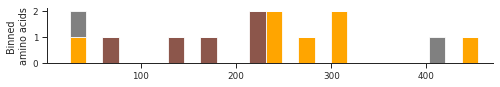

In [98]:
from matplotlib.ticker import MaxNLocator


fig, ax = plt.subplots(figsize=(8, 1))
plt.xlim(1, GENE_AA_LENGTH)

colors = [
    #     'red',
    "#FFA500", "#A020F0", "#8C564B", 'gray'
]
plt.rcParams["figure.dpi"] = 200
ax.hist(
    [
        #         mut_aa_d["truncated"],
        mut_aa_d["predicted functional disruption"],
        mut_aa_d["predicted structural disruption"],
        mut_aa_d["predicted functional and structural disruption"],
        mut_aa_d["unknown effect"]
    ],
    bins=25,
    #     density=1,
    #     width=2,
    histtype='bar',
    stacked=True,
    label=[
        #         "truncated",
        "predicted functional disruption", "predicted structural disruption", "predicted functional and structural disruption", "unknown effect"
    ],
    color=colors,
)

sns.despine(top=True, right=True, bottom=False, left=False)
# ax.set_xlabel("Amino acid bins")
ax.set_ylabel("Binned \namino acids")
# plt.legend(loc="upper left")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Forcing y-axis ticks to be integers

plt.title("")
plt.show()

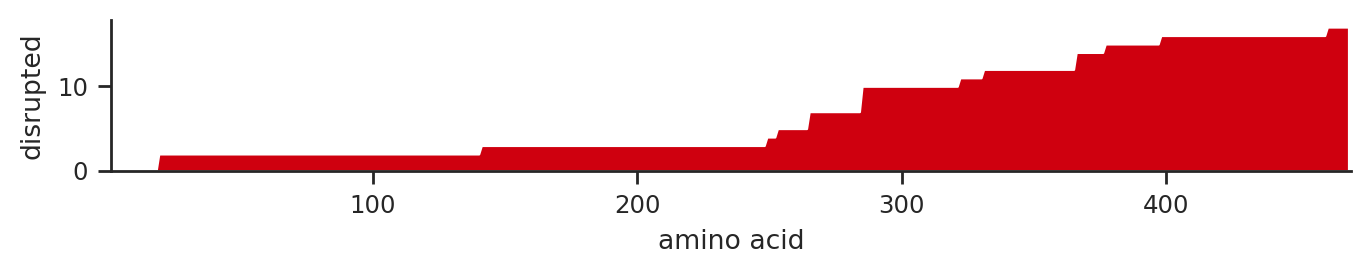

In [99]:
# Could replace this with the area plot to avoid having to manually find good bin sizes
mut_aa_d = {"truncated":[0]*GENE_AA_LENGTH,
            "unknown effect":[0]*GENE_AA_LENGTH,
            "predicted functional disruption":[0]*GENE_AA_LENGTH,
            "predicted structural disruption":[0]*GENE_AA_LENGTH,
            "predicted functional and structural disruption":[0]*GENE_AA_LENGTH,
           }

for _, m in meta_muts.iterrows():
    if m["truncation"]:
        for aa in range(m["AA range"][0], GENE_AA_LENGTH + 1):
            mut_aa_d["truncated"][aa - 1] += 1
            
x = range(0, GENE_AA_LENGTH)
plt.rcParams["figure.dpi"] = 200
plt.figure(figsize=(8,1))
ax = plt.stackplot(x,
              mut_aa_d["truncated"],
              colors=['#CF000F'])
# ax.set_ylabel("Amino acids")
sns.despine(top=True, right=True, bottom=False, left=False)
plt.ylabel('disrupted')
plt.xlabel('amino acid')
plt.xlim(1, GENE_AA_LENGTH)
plt.savefig("pykF_disrupt_coding_AAs.svg")